In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv("Expanded_data_with_more_features.csv")#.head(10)
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [50]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [52]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [53]:
df=df.drop("Unnamed: 0",axis=1)
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [54]:
df["TestPrep"]=df["TestPrep"].str.replace("none","NotPrepared")
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,NotPrepared,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,NotPrepared,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,NotPrepared,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,NotPrepared,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,NotPrepared,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,male,group E,high school,standard,NotPrepared,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


# Gender distribution

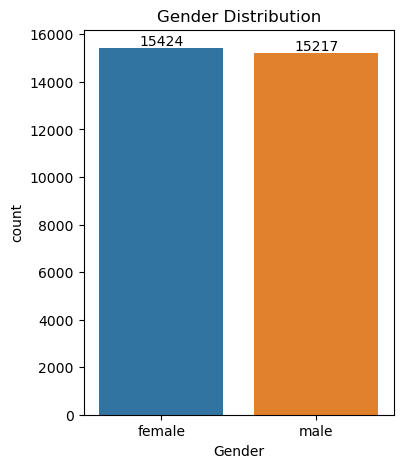

In [77]:
plt.figure(figsize=(4,5))
total = sns.countplot(x="Gender",data=df)
total.bar_label(total.containers[0])
plt.title("Gender Distribution")
plt.show()

from the above chart we have analyzed that:
the numbers of female in the data is more than the number of males

In [68]:
#To analyze parents education really impact on student

gb = df.groupby("ParentEduc").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
gb

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


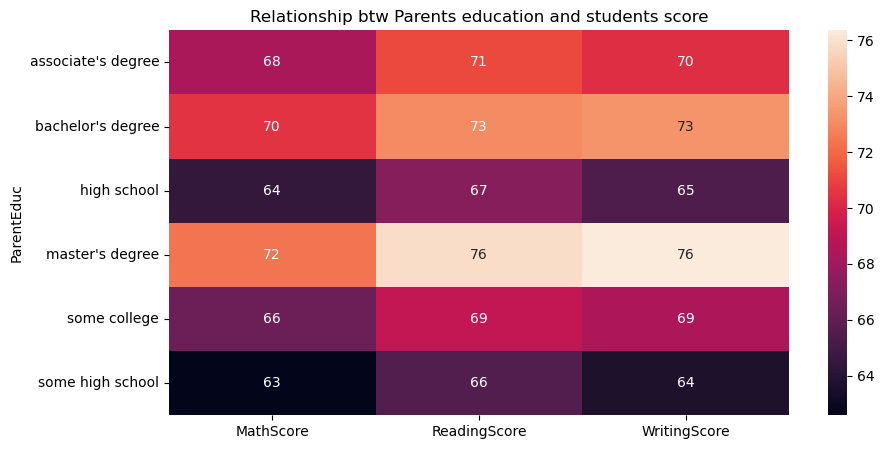

In [78]:
plt.figure(figsize=(10,5))
sns.heatmap(gb,annot=True)
plt.title("Relationship btw Parents education and students score")
plt.show()

From the above chart we have concluded that education of parents have a good impact on students

In [74]:
#To analyze parents education really impact on student

gb1 = df.groupby("ParentMaritalStatus").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
gb1

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


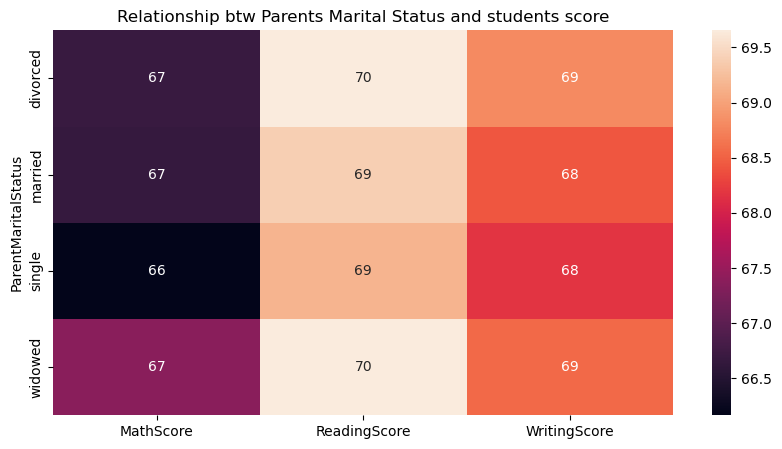

In [79]:
plt.figure(figsize=(10,5))
sns.heatmap(gb1,annot=True)
plt.title("Relationship btw Parents Marital Status and students score")
plt.show()

from the above chart we have concluded that ther is no/negligible impact on student's score due to their Parent Marital Status

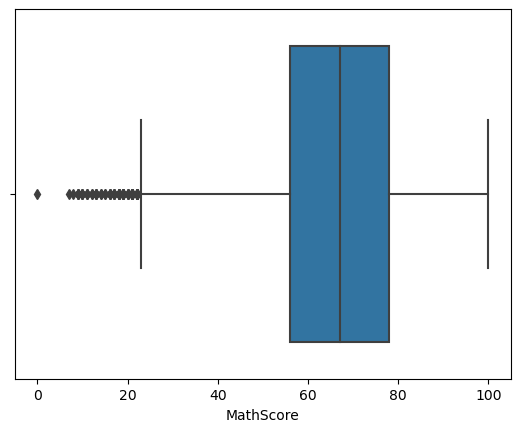

In [80]:
# Math score 
sns.boxplot(data=df,x="MathScore")
plt.show()

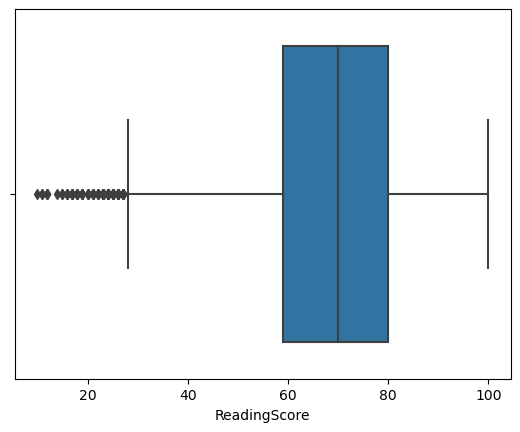

In [81]:
#Reading score
sns.boxplot(data=df,x="ReadingScore")
plt.show()

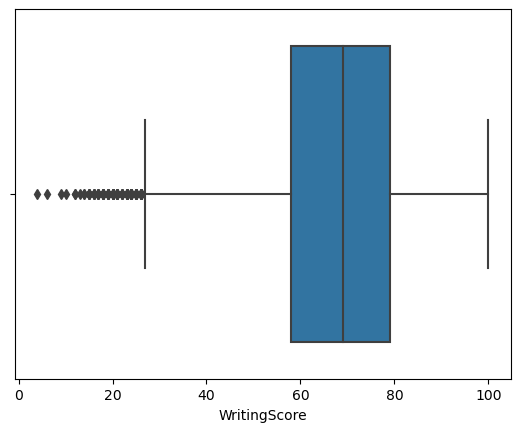

In [82]:
#Writing score
sns.boxplot(data=df,x="WritingScore")
plt.show()

from the above 3 charts we have concluded that students are struggling to get the marks in Maths

# Distribution of Ethnic groups

In [83]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


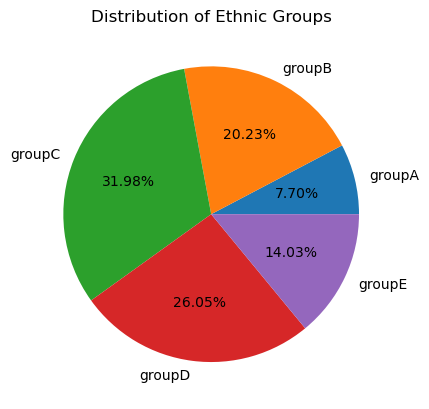

In [90]:
groupA = df.loc[(df["EthnicGroup"]=="group A")].count()
groupB = df.loc[(df["EthnicGroup"]=="group B")].count()
groupC = df.loc[(df["EthnicGroup"]=="group C")].count()
groupD = df.loc[(df["EthnicGroup"]=="group D")].count()
groupE = df.loc[(df["EthnicGroup"]=="group E")].count()

l=["groupA","groupB","groupC","groupD","groupE"]
mlist = [groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]
plt.pie(mlist,labels=l,autopct="%1.2f%%")
plt.title("Distribution of Ethnic Groups")
plt.show()

[Text(0, 0, '9212'),
 Text(0, 0, '5826'),
 Text(0, 0, '2219'),
 Text(0, 0, '7503'),
 Text(0, 0, '4041')]

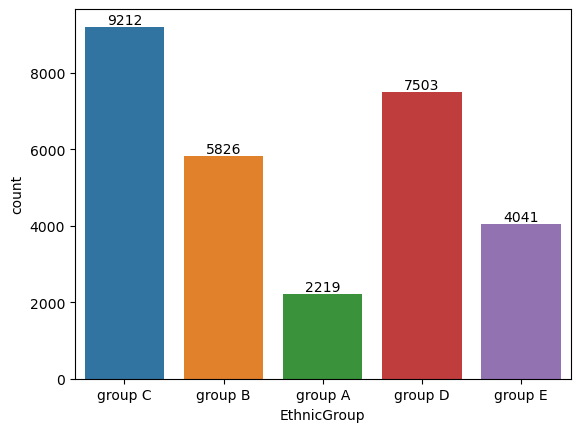

In [92]:
#to check count of each group
ax = sns.countplot(data=df,x="EthnicGroup")
ax.bar_label(ax.containers[0])
